In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

# Support Vector Machine
- It is a flexible class of supervised algorithms for <b>both classification and regression</b>.
- It is <b>discriminative</b> (compared with generative of navie bayes), meaning it <b>produces decision boundaries to divide classes</b> instead of generating probability distributions of classes, which is in general easier.

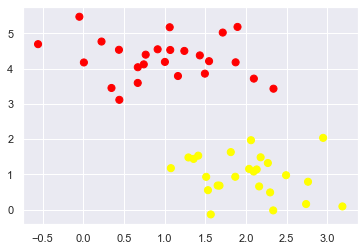

In [2]:
# generate a sample of two clusters
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

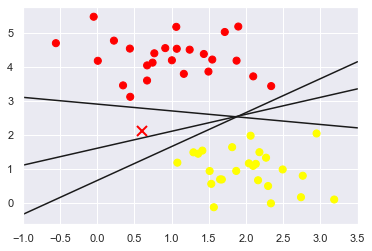

In [3]:
# draw different 'separators' to define class boundary by gut feeling
# X represents a new data point
# class boundary can have several solutions here
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

- The idea of support vector machine is to <b>add margins to each line/hyperplane up to the nearest data point of each class, followed by choosing the line/hyperplane with maximum margin as the optimal separtor</b>. Therefore it belongs to the group of maximum margin estimators.

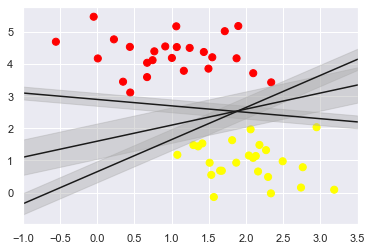

In [4]:
# In this case the middle line with the greatest margin would be our optimal separator
# great margin intuitively means a clearer separation
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

# Mathematics behind SVM

## Linear Algebra Prerequisite

### 2D Formula
1. Hyperplane (line here) formula $$ax+by+c=0$$ 

2. Distance of a point $x=(x_1, y_1)$ from the plane $ax+by+c=0$ 

$$\frac{\lvert ax_1+by_1+c \rvert}{\sqrt{a^2+b^2}}$$

3. Distance of the origin from the plane $ax+by+c=0$ 
$$\frac{\lvert c \rvert}{\sqrt{a^2+b^2}}$$

### 3D Formula
1. Hyperplane formula $$ax+by+cz+d=0$$ where $(a, b, c)$ is called the normal vector of the equation.


2. Projection of a vector ${\bf x}=(x, y, z)$ onto a unit vector ${\bf n}=(n_1, n_2, n_3)$ 

$$\lvert n_1x+n_2y+n_3z \rvert \cdot {\bf n}$$

3. Distance of a point $x=(x_1, y_1, z_1)$ from the plane $ax+by+cz+d=0$

$$ \frac{\lvert ax_1+by_1+cz_1+d \rvert}{\sqrt{a^2+b^2+c^2}} $$

4. Distance of the origin from the plane $ax+by+cz+d=0$ 
$$\frac{\lvert d \rvert}{\sqrt{a^2+b^2+c^2}}$$

- More about distance formula: https://mathinsight.org/distance_point_plane

### General formula for $k$ dimensions
1. Hyperplane formula $${\bf w}^T\cdot {\bf x} + b = 0 $$ where ${\bf w}$ is called the weight vector of the equation.


2. Projection of a vector ${\bf x}$ onto a unit vector ${\bf n}$ 
$$\lvert {\bf n} \cdot {\bf x} \rvert \cdot {\bf n}$$


3. Distance of a point $x$ from the plane ${\bf w}^T\cdot {\bf x} + b = 0 $
$$\frac{\lvert {\bf w}^T\cdot {\bf x} + b \rvert}{\|{\bf w}\|}$$

4. Distance of the origin from the plane ${\bf w}^T\cdot {\bf x} + b = 0 $
$$\frac{\lvert  b \rvert}{\|{\bf w}\|}$$


## Formulation fo SVM Optimization Problem

- Assuming we have two classes of data (target values represented by -1 and 1), the problem of SVM is to create a <b>hypothesis/classification function</b>

    $$h_{\bf w}({\bf x_i}) = \begin{cases} 
                        1 & \text{if } {\bf w}^T \cdot {\bf x_i}+b \ge 1 \\
                        -1 & \text{if } {\bf w}^T \cdot {\bf x_i}+b \le -1
                    \end{cases}
       \text{ for } 1 \le i \le n
    $$
    
    where ${\bf w}$ is weight vector, $b$ is the bias, ${\bf w}^T\cdot{\bf x}+b=0$ is the optimal decision boundary, ${\bf w}^T\cdot{\bf x}+b= \pm 1$ are the two hyperplanes that form the margins of the decision boundary.


- Or one could rewrite the problem in one line as:
    
    $$y_i({\bf w}^T \cdot {\bf x_i}-b) \ge 1 \text{ for } 1 \le i \le n $$
    
    where $n$ is the number of training data, $y_i$ is the target variable of training data.

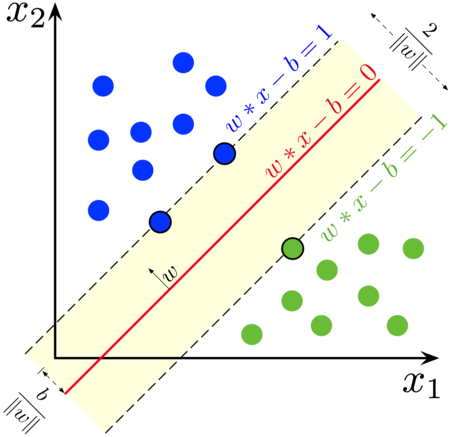

In [5]:
# the yellow area is the margin
display.Image('img/3_svm_hyperplane.png', width=350)

So we want to <b>find $w$ and $b$ that satisfy the above condition, and to maximize the width of margin which is equal to $\frac{2}{\|{\bf w}\|}$</b>, so it is equivalent to find $\bf w$ that has the minimal norm. It becomes a quadratic optimization problem that could be solved using <a href='https://en.wikipedia.org/wiki/Lagrange_multiplier'><b>Lagrange multiplier</b></a>.

- In ML, as the amount of data could be very large (> tens thousands), another way to find the opitimal boundary is to train the model iteratively, in this case we define a <b>cost function</b> similar as before, which is 
$$ \frac{1}{n}\sum_{i=1}^{n}max(0, 1-y_i({\bf w}^T \cdot{\bf x_i}-b)) + \lambda \|{\bf w}\|$$
- The first summation part is the <b>loss function</b> measuring the average deviation of predictions from target values.
- The second part is the <b>regularization</b>, where $\lambda$ determines the importance of maximizing margin size over the correctness of predictions. The larger the $\lambda$, the smaller the amount of misclassification is allowed. 

The above function $h(a) = max(0, 1-ya)$ is called the <b>hinge function</b> which has the following properties for penalizing incorrect predictions, used when there is no perfect decision boundary (find soft margin):

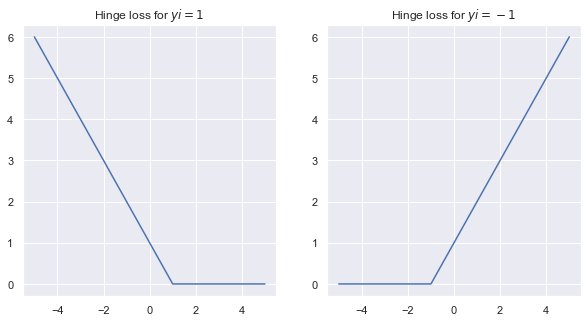

In [6]:
# visualize how hinge fcn works
def hinge(X, target):
    return np.maximum(0, 1-target*X)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
x = np.linspace(-5, 5, 11)
y1 = hinge(x, 1)
y2 = hinge(x, -1)

# if the true class is 1, h(a)=max(0, 1-a) error of prediction made with wx+b >=1 would be 0
ax[0].plot(x, y1)
ax[0].set_title('Hinge loss for $yi=1$')

# if the true class is -1, h(a)=max(0, 1+a), error of prediction made with wx+b <= -1 would be 0
ax[1].plot(x, y2)
ax[1].set_title('Hinge loss for $yi=-1$');

The above formulation is called the <b>primal problem</b> of support vector machine. 
For a complete mathematical explaination, take a look at http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf.

# SVM with sklearn

## Linear Boundary Problem

In [7]:
from sklearn.svm import SVC  # "Support vector classifier"
# Kernel is the function used to transform data points before classification, 
# especially useful for data having non-linear decision curve/surface
# C is a regularization classifier, inveresly proportional to the strength of regularization
# A small C smoothes decision boundary while a large C aims at classifying all training examples correctly
# if there are many noises in data a smaller C is preferred
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)    # return the value of decision function in the grid
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

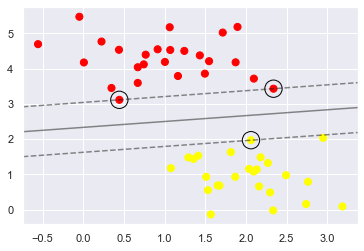

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

- The area between the two dashed lines is called the <b>margin</b>.
- The training points that just touch the margin are the <b>support vectors</b> of the model, which are the only points that contributes to the cost function of the model.

In [10]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [11]:
# fcn to plot N data points and the corresponding svm descision boundary
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

In [12]:
# interactive visualization
from ipywidgets import interact, fixed
interact(plot_svm, N=[60, 120], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(60, 120), value=60), Output()), _dom_classes=('widget…

In [13]:
# interact fcn in ipywidgets
# more at https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html?highlight=interact#Basic-interact
def f(x):
    return x**5
interact(f, x=10);    # silder for a value
interact(f, x=[10, 20]);    # dropdown for a list of values

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(Dropdown(description='x', options=(10, 20), value=10), Output()), _dom_classes=('widget-…

## Nonlinear Boundary Problem
- Similar to applying basis functions in linear regression, if the <b>optimal decision boundary is non-linear</b>, we need a <b>kernel function</b> to project the data points to higher dimension such that they become linearly separable.

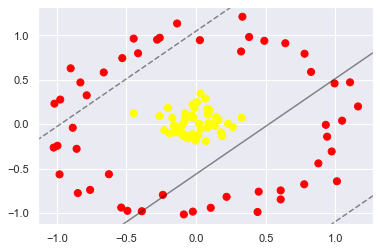

In [14]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

We could use a <b>radial basis function kernel (RBF)</b>, which value depends on the radius of a point from the origin (i.e. Euclidean distance from the origin), to project them to 3D with obvious difference in the z value here.
$$K(x) =  e^{-\gamma\|x\|^2}$$ where $\gamma = 1$ by default in sklearn

- When $\gamma$ is small, the model will fit training data loosely which may lead to underfit. 
- When $\gamma$ is large, the model will fit training data precisely which may lead to overfit.

In [15]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    r = np.exp(-(X ** 2).sum(axis=1))    # kernel function
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)    # set initial view
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[30,90], X=fixed(X), y=fixed(y));     # need to fix X, y 

interactive(children=(Dropdown(description='elev', options=(30, 90), value=30), IntSlider(value=30, descriptio…

In [16]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

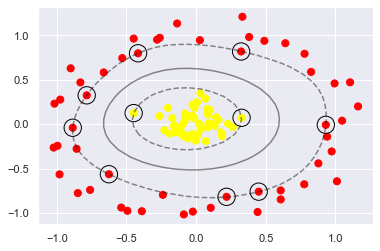

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, facecolors='none');

## Soft Margins for SVM
- For cases without a perfect decision boundary
- The $C (\sim\frac{1}{\lambda})$ <b>parameter determines the penalty for misclassifying an observation and control the softness of a decison boundary</b>: for very large $C$ the margin is hard and no point is allowed to lie in it, for smaller $C$ the margin is soft which allows some points to lie on it.

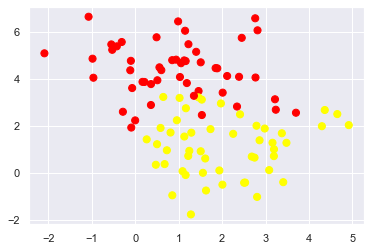

In [18]:
# data without perfect decision boundary by setting cluster with higher sd
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

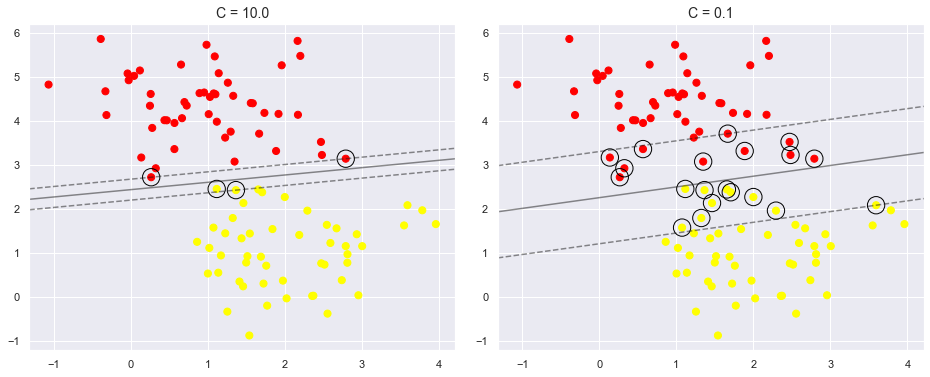

In [19]:
# compare decision boundary of C=10 and C=0.1
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

For <b>multi-class classification</b>, we can generalize the above binary classification method by <b>one vs rest</b> strategy, i.e. treat all classes other than the class to classify as another class.

# A Brief Use Case of SVM on Multi-class Classfication Problem

In [20]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)    # each pic has 62x47 pixels

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


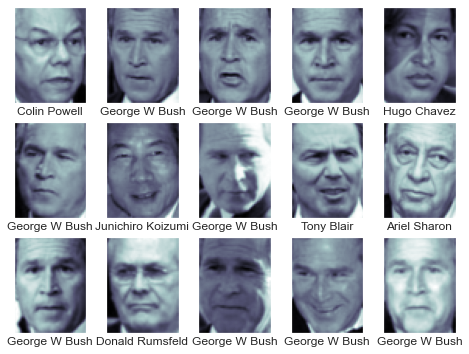

In [21]:
fig, ax = plt.subplots(3, 5, figsize=(8,6))
for i, axi in enumerate(ax.flat):    # flatten 2d array of ax
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [22]:
# check target distribution
# imbalanced data
from collections import Counter
target = [faces.target_names[x] for x in faces.target]
df = pd.DataFrame(Counter(target).items(), columns=['target', 'freq'])
df

,target,freq
0,Colin Powell,236
1,George W Bush,530
2,Hugo Chavez,71
3,Junichiro Koizumi,60
4,Tony Blair,144
5,Ariel Sharon,77
6,Donald Rumsfeld,121
7,Gerhard Schroeder,109


- For <b>imbalanced data</b>, we have to adjust the weight of parameter $C$ to <b>increase penalty for misclassifying minority classes</b> to prevent them from overwhelming by the majority classes. 
- In sklearn, one can do this by setting the parameter class_weight='balanced', where the parameter of each class $j$ is given by $$ C_j = C*w_j $$ where $w_j$ is the weight of class j which is <b>inversely proportional to the no. of observations of class $j$</b>

In [23]:
# make model pipeline: PCA >> SVC
from sklearn.svm import SVC
model = SVC(kernel='rbf', class_weight='balanced')
# class_weight = balance 
# will increase the penalty for misclassifying minority classes to prevent them from being “overwhelmed” by the majority class

In [24]:
# split data for training and testing
from sklearn.model_selection import train_test_split
# faces.data contain flattened arrays of images
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [25]:
# get the best model from grid search, predict test data
model.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

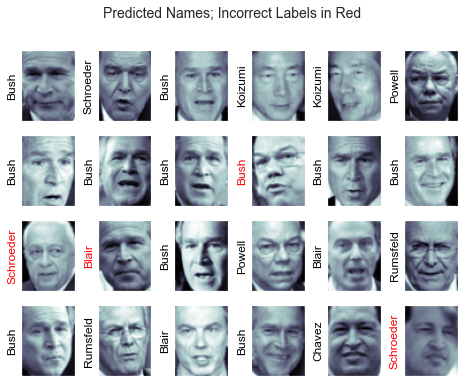

In [26]:
# visualize first 24 predicted results
fig, ax = plt.subplots(4, 6, figsize=(8,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')   # reshape 1d array to 2d image
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],    # get last name only
                   color='black' if yfit[i] == ytest[i] else 'red')    # highlight wrongly predicted names by red
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

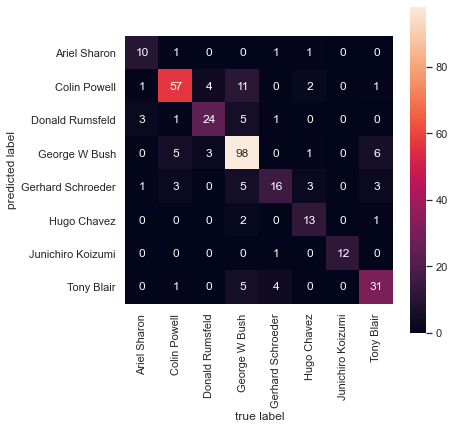

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)    # mat_ij = # of true value class i while predicted class j
plt.figure(figsize=(6, 6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('img/svm.png', bbox_inches='tight');

In [28]:
# Compute the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, yfit)

0.7744807121661721

# Advantages and Disadvantages of SVM
Some advantages and disadvantages of using SVM are as follow:
- Advantages
    1. Memory efficent as it uses a subset of training data (support vectors) for boundary decision
    2. It works well with high-dimensional data
    3. Custom kernel function can be used for a particular problem
<br><br>
- Disadvantages
    1. It is not easy to engineer the right kernel function for a problem.
    2. It overfits training data easily if the number of features is much greater than the number of samples.